##Task 1
#####The marketing manager checked the account record and shared the relevant information with you (regression1.txt). Each row is the monthly record and the record has two numbers separated by ‘,’. The first number is the advertisement cost we spent (k Euro) and the second number is the new client we got. Please plot the data to show the relationship between the advertisement cost and the number of clients we got that month. Note: the marketing manager will use your figure in his presentation for the marketing team meeting. So please pay attention so that everyone would understand the figure without extra words.

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [24]:
# load a single file as a numpy array
def load_file(filepath):
  dataframe = pd.read_csv(filepath, sep = ",", header=None, decimal='.')
  data = dataframe
  df = data.astype(float)
  return df

data = load_file('/content/gdrive/My Drive/Colab Notebooks/ReadSpeaker Project/regression1.txt')
print(data)
print(data.dtypes)

        0       1
0   190.0  74.873
1   106.0  14.165
2   196.0  66.781
3   193.0  72.596
4   130.0  44.386
5   109.0  12.820
6   172.0  69.483
7   178.0  66.698
8   139.0  52.434
9   166.0  72.705
10  181.0  72.703
11  151.0  58.949
12  199.0  67.193
13  169.0  69.196
14  112.0  23.591
15  142.0  50.810
16  187.0  67.938
17  184.0  67.464
18  154.0  60.648
19  175.0  72.226
20  118.0  27.424
21  121.0  28.337
22  103.0  18.077
23  148.0  58.152
24  100.0   8.089
25  145.0  55.573
26  115.0  31.301
27  133.0  43.360
28  127.0  38.852
29  124.0  34.901
30  136.0  44.943
0    float64
1    float64
dtype: object


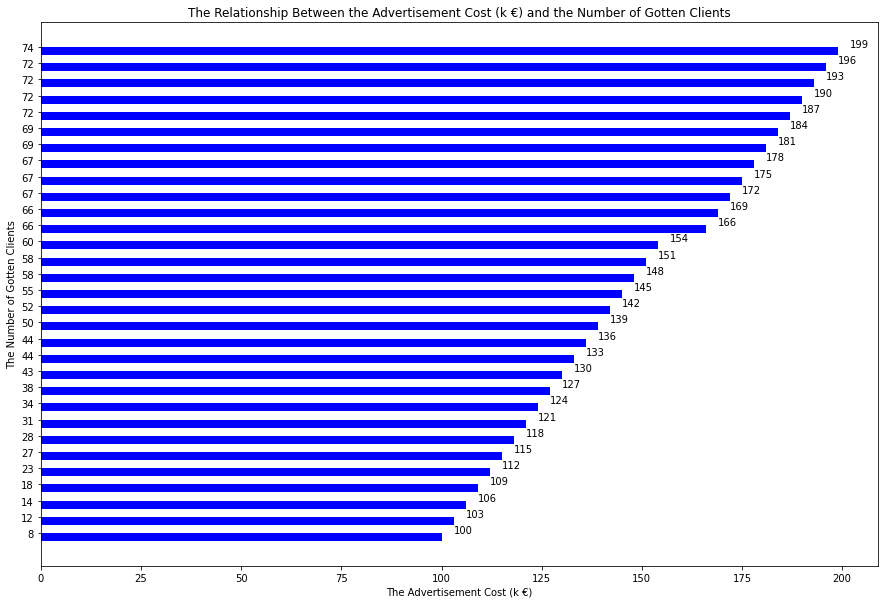

In [25]:
#Define x,y
x = np.sort(data[1])
y = np.sort(data[0]).astype(int)

# Plotting
fig, ax = plt.subplots(figsize = (15,10)) 
width = 0.5
ind = np.arange(len(y))  
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+(width/2))
roundedx = x.astype(int)
ax.set_yticklabels(roundedx)
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='black')
plt.title("The Relationship Between the Advertisement Cost (k \N{euro sign}) and the Number of Gotten Clients")
plt.xlabel("The Advertisement Cost (k \N{euro sign})")
plt.ylabel("The Number of Gotten Clients")     
plt.show()

##Task 2
####The marketing manager asked you, “There is a gap around 160k Euro. According to you, how many clients are we expected to get if we invest 160k Euro?”

####subtask A
######To give him a convincing answer, you decided to derive a trend line/curve. Although there are many factors that may influence the outcome, for simplicity you assume that the number of the new clients (y) can be explained only by the advertisement cost (x).

Text(0.5, 0, 'Cost (k €)')

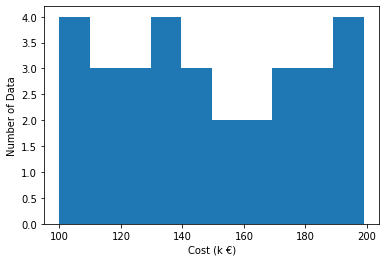

In [ ]:
#Histogram to see the distribution of data
%matplotlib inline
# density=False would make counts
plt.hist(y, density=False)  
plt.ylabel('Number of Data')
plt.xlabel('Cost (k \N{euro sign})')

It shows that the number of data in the neighbours of 160k Euro is lower than other parts.

In [26]:
# Since I rounded up the number of gotten clients, I define  the fubction as "predict_ry". r here meanrs rounded!
def predict_ry(C):
  xdata = np.sort(data[0])
  ydata = np.sort(data[1])
  plt.plot(xdata,ydata,"ro")


  # Defining the Sigmoid function
  def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y
  beta_1 = 0.135
  beta_2 = 150.

  #logistic function
  Y_pred = sigmoid(xdata, beta_1 , beta_2)


  # Lets normalize our data
  xdata =xdata/max(xdata)
  ydata =ydata/max(ydata)

  
  # Fittign the Curve
  popt, pcov = curve_fit(sigmoid, xdata, ydata)
  

  # Fiting the Sigmoid Function on the Data 
  x = np.linspace(100, 200, 50)
  x = x/max(x)
  plt.figure(figsize=(10,7))
  y = sigmoid(x, *popt)
  p = C/max(data[0])
  client_norm = sigmoid(p, *popt)
  client = client_norm * max(data[1])
  r_client = int(np.round(client))

  #Plotting
  Dx = xdata*max(data[0])
  Dy = ydata*max(data[1])
  Dxx = x*max(data[0])
  Dyy = y*max(data[1])
  plt.plot(Dx, Dy, 'ro', label='data')
  plt.plot(Dxx,Dyy, linewidth=3.0, label='fit')
  plt.legend(loc='best')
  plt.title("The Relationship Between the Advertisement Cost (k \N{euro sign}) and the Number of Gotten Clients")
  plt.ylabel("The Advertisement Cost (k \N{euro sign})")
  plt.xlabel("The Number of Gotten Clients")
  plt.show()

  #Printing the Parameters
  print("Data X is: ", xdata)
  print("Data Y is: ", ydata)
  print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))
  print(" Popt is: {}" .format(popt))
  return print("If you invest {}k Euro, you will get {} clients." .format(C,r_client))


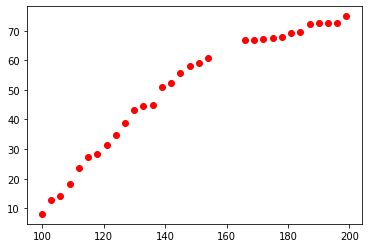

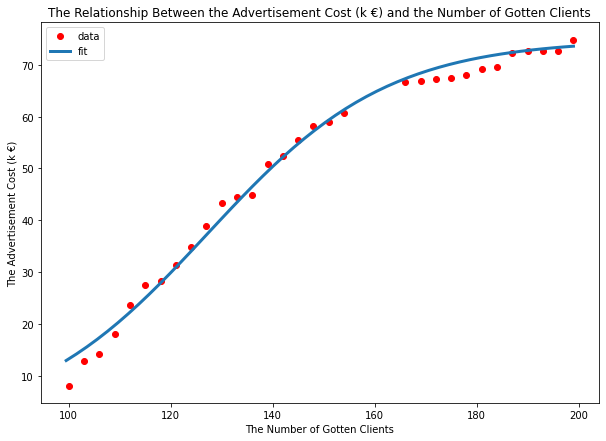

Data X is:  [0.50251256 0.51758794 0.53266332 0.54773869 0.56281407 0.57788945
 0.59296482 0.6080402  0.62311558 0.63819095 0.65326633 0.66834171
 0.68341709 0.69849246 0.71356784 0.72864322 0.74371859 0.75879397
 0.77386935 0.83417085 0.84924623 0.86432161 0.87939698 0.89447236
 0.90954774 0.92462312 0.93969849 0.95477387 0.96984925 0.98492462
 1.        ]
Data Y is:  [0.10803627 0.17122327 0.18918702 0.2414355  0.3150802  0.36627356
 0.37846754 0.41805457 0.46613599 0.51890535 0.57911397 0.59281717
 0.60025643 0.67861579 0.70030585 0.74223018 0.77667517 0.78731986
 0.81001162 0.89081511 0.89192366 0.89742631 0.90104577 0.90737649
 0.92417828 0.92801143 0.9646468  0.9695885  0.97101759 0.9710443
 1.        ]
 beta_1 = 11.243649, beta_2 = 0.639491
 Popt is: [11.24364869  0.63949076]
If you invest 160k Euro, you will get 65 clients.


In [27]:
predict_ry(160)

####subtask B
######Using your predict_y(x) function, please calculate the predicted number of new clients at each
advertisement cost in the given data (Y_hat) and draw them onto the figure of Task 1.

In [28]:
# A Function to Predict the exact number of gotten customers (without rounding up)
def predict_y(C):
  xdata = np.sort(data[0])
  ydata = np.sort(data[1])
  
  # Defining the Sigmoid function
  def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y
  beta_1 = 0.135
  beta_2 = 150.

  #logistic function
  Y_pred = sigmoid(xdata, beta_1 , beta_2)


  # Lets normalize our data
  xdata =xdata/max(xdata)
  ydata =ydata/max(ydata)

  
  # Fittign the Curve
  popt, pcov = curve_fit(sigmoid, xdata, ydata)
  

  # Fiting the Sigmoid Function on the Data 
  x = np.linspace(100, 200, 50)
  x = x/max(x)
  y = sigmoid(x, *popt)
  p = C/max(data[0])
  client_norm = sigmoid(p, *popt)
  client = client_norm * max(data[1])
  return client

In [29]:
predict_y(160)

64.69899868761061

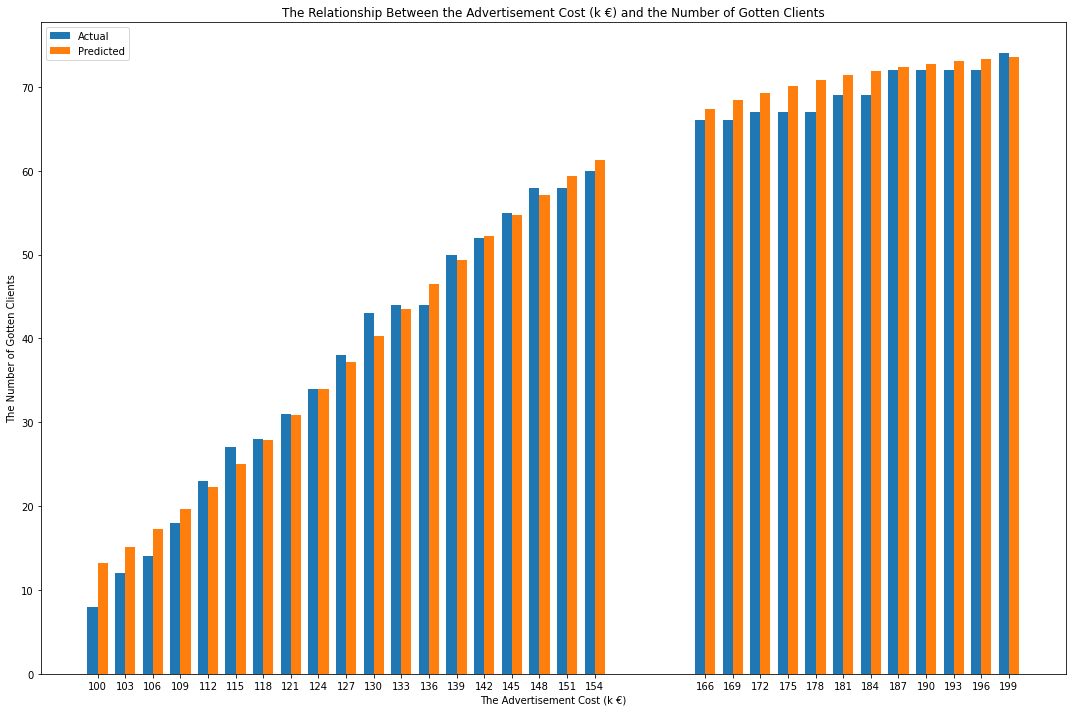

In [30]:
x = np.sort(data[0])
y = np.sort(data[1]).astype(int)

width = 1.1
rows = []
for i in (np.sort(data[0])):
  k = predict_y(i)
  rows.append([i,k])
df = pd.DataFrame(rows)
ydf = np.sort(df[1])

# Plotting
fig, ax = plt.subplots(figsize = (15,10))
rects1 = ax.bar(x - width/2, y, width, label='Actual')
rects2 = ax.bar(x + width/2, ydf , width, label='Predicted')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("The Advertisement Cost (k \N{euro sign})")
ax.set_ylabel("The Number of Gotten Clients")
ax.set_title("The Relationship Between the Advertisement Cost (k \N{euro sign}) and the Number of Gotten Clients")
ax.set_xticks(x,)

ax.legend()

fig.tight_layout()

plt.show()

####Subtask C
######Please implement the function which will show how precise your prediction is i.e. average error between the predicted value and the real value.

In [32]:
def calc_error():
  
  xdata = data[0]/max(data[0])
  ydata = data[1]/max(data[1])

  # First, it is needed to split the data to train/test sections:
  ttd = np.random.rand(len(df)) < 0.7
  train_x = xdata[ttd]
  test_x = xdata[~ttd]
  train_y = ydata[ttd]
  test_y = ydata[~ttd]

  # See what is the condition of Train Section:
  def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y
  popt, pcov = curve_fit(sigmoid, train_x, train_y)

  # Then, applying the Curve Fit to test Section:
  y_hat = sigmoid(test_x, *popt)

  # Finally, evaluation based on different methods:
  print("Mean absolute error: %.3f" % np.mean(np.absolute(y_hat - test_y)))
  print("Residual sum of squares (MSE): %.3f" % np.mean((y_hat - test_y) ** 2))
  return print("R2-score: %.3f" % r2_score(y_hat , test_y))

In [33]:
calc_error()

Mean absolute error: 0.044
Residual sum of squares (MSE): 0.003
R2-score: 0.967


##Task 3 (optional)
####The marketing manager just received the recent account record. The updated data is in regression2.txt. Please update (if necessary) your predict_y(x) function accordingly.

In [ ]:
# Unfortunately I am at the middle of vacation. If I was not, I solve this problem as well!

##Questions Part

How much time did you spend on this assignment (this is to measure the difficulty of the assignment but not you)?

In [ ]:
# I spent around 5 hours for the assignment.

What kind of resources did you use?

In [ ]:
# I used the libraries' help and guidlines.

In Task 2-A / Task 3, why did you use the particular curve / assumption?

In [21]:
# I used the sigmoid since I knew it as the best non-linear curve fitting function. 
# It can cover many different features of a data that might be appeared in the dataset.

Do you think adding more data will help in improving accuracy? Why?

In [20]:
# I beleive that adding more data can help use to improve the neural network-base generalization.
# Definitely NNs can lead to a better accuracy.

Do you think a more complex algorithm is needed to improve the results? Why?

In [22]:
# I argue that in this classic methodologies in machine learning, more complex algorithms do not work so much better.
# Yet, in domain of deep learning more complex algorithms can work (depends on the number of datas).

In a more realistic scenario, you will have a series of new investments which you haven’t
observed at the given data. How will you ensure your prediction is as correct as possible?

In [23]:
# in more realistic scenario, I have to check the accuracy of prediction through the newly observed data regularly.
# In case I could access to reliable amount of them, I should involve them in the prediction algorithms.
# Otherwise, the newly observed data can be seen as "the test data".